In [115]:
from pyspark.sql import SparkSession
import matplotlib.pyplot as plt
import pandas as pd

In [33]:
spark = SparkSession.builder.appName('Classification').getOrCreate()

In [34]:
dataset = spark.read.csv('hdfs://localhost:9000/user/thatsaphon/diabetes.csv',header=True,inferSchema=True)

- Pregnancies จำนวนครั้งที่ผู้ป่วยเคยตั้งครรภ์
- Glucose ระดับน้ำตาลในเลือด
- BloodPressure ความดันโลหิต
- SkinThickness ความหนาของผิวหนัง
- Insulin ระดับอินซูลินในเลือด
- BMI ดัชนีมวลกาย (Body Mass Index) ซึ่งคำนวณจากน้ำหนักและส่วนสูง
- DiabetesPedigreeFunction ฟังก์ชันที่ใช้วัดความเสี่ยงทางพันธุกรรมของโรคเบาหวาน ซึ่งคำนวณจากข้อมูลทางพันธุกรรมของผู้ป่วยและบรรพบุรุษ
- Age อายุของผู้ป่วย
- Outcome ผลลัพธ์ของการทดสอบโรคเบาหวาน (0 = ไม่เป็นโรคเบาหวาน, 1 = เป็นโรคเบาหวาน)

In [117]:
dataset.show(20)

+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
|Pregnancies|Glucose|BloodPressure|SkinThickness|Insulin| BMI|DiabetesPedigreeFunction|Age|Outcome|
+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
|          6|    148|           72|           35|      0|33.6|                   0.627| 50|      1|
|          1|     85|           66|           29|      0|26.6|                   0.351| 31|      0|
|          8|    183|           64|            0|      0|23.3|                   0.672| 32|      1|
|          1|     89|           66|           23|     94|28.1|                   0.167| 21|      0|
|          0|    137|           40|           35|    168|43.1|                   2.288| 33|      1|
|          5|    116|           74|            0|      0|25.6|                   0.201| 30|      0|
|          3|     78|           50|           32|     88|31.0|                   0.248| 26|      1|


In [36]:
dataset.printSchema()

root
 |-- Pregnancies: integer (nullable = true)
 |-- Glucose: integer (nullable = true)
 |-- BloodPressure: integer (nullable = true)
 |-- SkinThickness: integer (nullable = true)
 |-- Insulin: integer (nullable = true)
 |-- BMI: double (nullable = true)
 |-- DiabetesPedigreeFunction: double (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Outcome: integer (nullable = true)



In [120]:
dataset.describe().show()

+-------+------------------+-----------------+------------------+------------------+------------------+------------------+------------------------+------------------+------------------+
|summary|       Pregnancies|          Glucose|     BloodPressure|     SkinThickness|           Insulin|               BMI|DiabetesPedigreeFunction|               Age|           Outcome|
+-------+------------------+-----------------+------------------+------------------+------------------+------------------+------------------------+------------------+------------------+
|  count|               768|              768|               768|               768|               768|               768|                     768|               768|               768|
|   mean|3.8450520833333335|     120.89453125|       69.10546875|20.536458333333332| 79.79947916666667|31.992578124999977|      0.4718763020833327|33.240885416666664|0.3489583333333333|
| stddev|  3.36957806269887|31.97261819513622|19.355807170644777|15.95

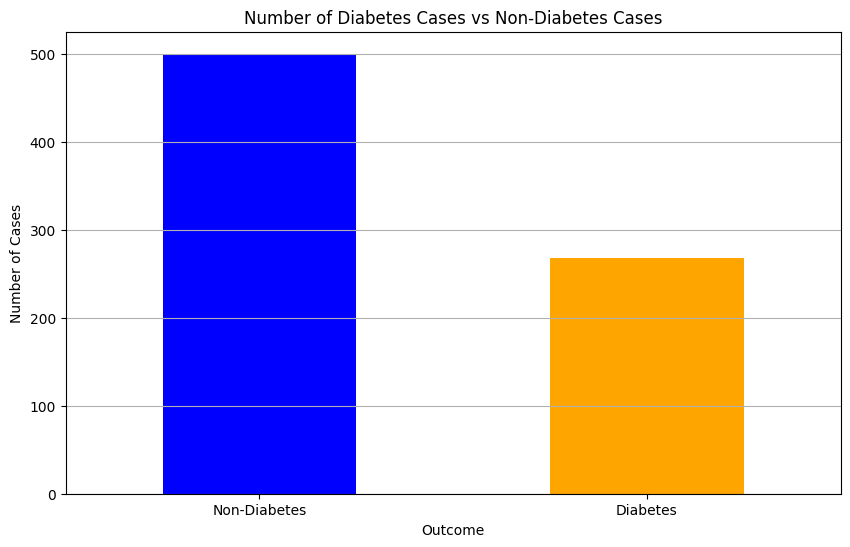

In [129]:
pandas_df = dataset.toPandas()
# ทำการ plot เพื่อดูจำนวนคนที่ไม่เป็นโรคเบาหวาน และเป็นโรคเบาหวาน
plt.figure(figsize=(10, 6))
pandas_df['Outcome'].value_counts().plot(kind='bar', color=['blue', 'orange'])
plt.title('Number of Diabetes Cases vs Non-Diabetes Cases')
plt.xlabel('Outcome')
plt.ylabel('Number of Cases')
plt.xticks([0, 1], ['Non-Diabetes', 'Diabetes'], rotation=0)
plt.grid(axis='y')
plt.show()

In [37]:
#pyspark.sql.functions. ฟังก์ชันนี้ใช้ในการอ้างอิงคอลัมน์ของ DataFrame ใน PySpark
from pyspark.sql.functions import col
#new_data: DataFrame ใหม่ที่มีคอลัมน์ทั้งหมดของ dataset แต่ชนิดข้อมูลของทุกคอลัมน์จะถูกแปลงเป็น float
new_data = dataset.select(*(col(c).cast("float").alias(c) for c in dataset.columns))

In [38]:
new_data.show()

+-----------+-------+-------------+-------------+-------+----+------------------------+----+-------+
|Pregnancies|Glucose|BloodPressure|SkinThickness|Insulin| BMI|DiabetesPedigreeFunction| Age|Outcome|
+-----------+-------+-------------+-------------+-------+----+------------------------+----+-------+
|        6.0|  148.0|         72.0|         35.0|    0.0|33.6|                   0.627|50.0|    1.0|
|        1.0|   85.0|         66.0|         29.0|    0.0|26.6|                   0.351|31.0|    0.0|
|        8.0|  183.0|         64.0|          0.0|    0.0|23.3|                   0.672|32.0|    1.0|
|        1.0|   89.0|         66.0|         23.0|   94.0|28.1|                   0.167|21.0|    0.0|
|        0.0|  137.0|         40.0|         35.0|  168.0|43.1|                   2.288|33.0|    1.0|
|        5.0|  116.0|         74.0|          0.0|    0.0|25.6|                   0.201|30.0|    0.0|
|        3.0|   78.0|         50.0|         32.0|   88.0|31.0|                   0.248|26.0

In [39]:
new_data.printSchema()

root
 |-- Pregnancies: float (nullable = true)
 |-- Glucose: float (nullable = true)
 |-- BloodPressure: float (nullable = true)
 |-- SkinThickness: float (nullable = true)
 |-- Insulin: float (nullable = true)
 |-- BMI: float (nullable = true)
 |-- DiabetesPedigreeFunction: float (nullable = true)
 |-- Age: float (nullable = true)
 |-- Outcome: float (nullable = true)



In [40]:
from pyspark.sql.functions import col, count, isnan, when
#checking for null or nan type values in our columns
new_data.select([count(when(col(c).isNull(), c)).alias(c) for c in new_data.columns]).show()

+-----------+-------+-------------+-------------+-------+---+------------------------+---+-------+
|Pregnancies|Glucose|BloodPressure|SkinThickness|Insulin|BMI|DiabetesPedigreeFunction|Age|Outcome|
+-----------+-------+-------------+-------------+-------+---+------------------------+---+-------+
|          0|      0|            0|            0|      0|  0|                       0|  0|      0|
+-----------+-------+-------------+-------------+-------+---+------------------------+---+-------+



In [41]:
from pyspark.ml.feature import VectorAssembler
cols=new_data.columns
# outcome คือ label ที่ต้องการ predict เลยต้องลบออก เอาเฉพาะ feature มา train
cols.remove("Outcome")
assembler = VectorAssembler(inputCols=cols,outputCol="features")

#รวมคอลัมน์ต่าง ๆ ใน DataFrame new_data เข้าเป็นคอลัมน์เดียวชื่อ features และเก็บผลลัพธ์ไว้ใน DataFrame ใหม่ที่ชื่อว่า data ; 8 attributes
data=assembler.transform(new_data)
#แสดงผลลัพธ์โดยไม่ตัดข้อความ (truncate=False)
data.select("features",'Outcome').show(truncate=False)

+-----------------------------------------------------------------------+-------+
|features                                                               |Outcome|
+-----------------------------------------------------------------------+-------+
|[6.0,148.0,72.0,35.0,0.0,33.599998474121094,0.6269999742507935,50.0]   |1.0    |
|[1.0,85.0,66.0,29.0,0.0,26.600000381469727,0.35100001096725464,31.0]   |0.0    |
|[8.0,183.0,64.0,0.0,0.0,23.299999237060547,0.671999990940094,32.0]     |1.0    |
|[1.0,89.0,66.0,23.0,94.0,28.100000381469727,0.16699999570846558,21.0]  |0.0    |
|[0.0,137.0,40.0,35.0,168.0,43.099998474121094,2.2880001068115234,33.0] |1.0    |
|[5.0,116.0,74.0,0.0,0.0,25.600000381469727,0.20100000500679016,30.0]   |0.0    |
|[3.0,78.0,50.0,32.0,88.0,31.0,0.24799999594688416,26.0]                |1.0    |
|[10.0,115.0,0.0,0.0,0.0,35.29999923706055,0.1340000033378601,29.0]     |0.0    |
|[2.0,197.0,70.0,45.0,543.0,30.5,0.15800000727176666,53.0]              |1.0    |
|[8.0,125.0,96.0

In [42]:
new_data.columns

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

In [43]:
cols

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [44]:
#การ Scale ข้อมูลใน Machine Learning คือการปรับค่าของแต่ละ feature ให้มีค่าอยู่ในช่วงเดียวกันหรือประมาณกัน เพื่อให้โมเดลสามารถเรียนรู้และทำนายผลได้ดีขึ้น โดยทั่วไปแล้ว Scale จะใช้กับข้อมูลที่มีค่าต่างกันมากๆ 
#เช่น ข้อมูลที่มีหน่วยวัดต่างกัน เช่น น้ำหนัก (kg), ความยาว (cm), อุณหภูมิ (Celsius) เป็นต้น
#กระจายข้อมูลให้มีค่า mean 0 และ std 1
from pyspark.ml.feature import StandardScaler
standardscaler=StandardScaler().setInputCol("features").setOutputCol("Scaled_features")
data=standardscaler.fit(data).transform(data)

In [45]:
data.show()

+-----------+-------+-------------+-------------+-------+----+------------------------+----+-------+--------------------+--------------------+
|Pregnancies|Glucose|BloodPressure|SkinThickness|Insulin| BMI|DiabetesPedigreeFunction| Age|Outcome|            features|     Scaled_features|
+-----------+-------+-------------+-------------+-------+----+------------------------+----+-------+--------------------+--------------------+
|        6.0|  148.0|         72.0|         35.0|    0.0|33.6|                   0.627|50.0|    1.0|[6.0,148.0,72.0,3...|[1.78063837321943...|
|        1.0|   85.0|         66.0|         29.0|    0.0|26.6|                   0.351|31.0|    0.0|[1.0,85.0,66.0,29...|[0.29677306220323...|
|        8.0|  183.0|         64.0|          0.0|    0.0|23.3|                   0.672|32.0|    1.0|[8.0,183.0,64.0,0...|[2.37418449762590...|
|        1.0|   89.0|         66.0|         23.0|   94.0|28.1|                   0.167|21.0|    0.0|[1.0,89.0,66.0,23...|[0.29677306220323...|

In [48]:
data.select("features",'Scaled_features','Outcome').show()

+--------------------+--------------------+-------+
|            features|     Scaled_features|Outcome|
+--------------------+--------------------+-------+
|[6.0,148.0,72.0,3...|[1.78063837321943...|    1.0|
|[1.0,85.0,66.0,29...|[0.29677306220323...|    0.0|
|[8.0,183.0,64.0,0...|[2.37418449762590...|    1.0|
|[1.0,89.0,66.0,23...|[0.29677306220323...|    0.0|
|[0.0,137.0,40.0,3...|[0.0,4.2849165233...|    1.0|
|[5.0,116.0,74.0,0...|[1.48386531101619...|    0.0|
|[3.0,78.0,50.0,32...|[0.89031918660971...|    1.0|
|[10.0,115.0,0.0,0...|[2.96773062203238...|    0.0|
|[2.0,197.0,70.0,4...|[0.59354612440647...|    1.0|
|[8.0,125.0,96.0,0...|[2.37418449762590...|    1.0|
|[4.0,110.0,92.0,0...|[1.18709224881295...|    0.0|
|[10.0,168.0,74.0,...|[2.96773062203238...|    1.0|
|[10.0,139.0,80.0,...|[2.96773062203238...|    0.0|
|[1.0,189.0,60.0,2...|[0.29677306220323...|    1.0|
|[5.0,166.0,72.0,1...|[1.48386531101619...|    1.0|
|[7.0,100.0,0.0,0....|[2.07741143542266...|    1.0|
|[0.0,118.0,

In [49]:
assembled_data = data.select("Scaled_features","Outcome")
assembled_data.show()

+--------------------+-------+
|     Scaled_features|Outcome|
+--------------------+-------+
|[1.78063837321943...|    1.0|
|[0.29677306220323...|    0.0|
|[2.37418449762590...|    1.0|
|[0.29677306220323...|    0.0|
|[0.0,4.2849165233...|    1.0|
|[1.48386531101619...|    0.0|
|[0.89031918660971...|    1.0|
|[2.96773062203238...|    0.0|
|[0.59354612440647...|    1.0|
|[2.37418449762590...|    1.0|
|[1.18709224881295...|    0.0|
|[2.96773062203238...|    1.0|
|[2.96773062203238...|    0.0|
|[0.29677306220323...|    1.0|
|[1.48386531101619...|    1.0|
|[2.07741143542266...|    1.0|
|[0.0,3.6906580274...|    1.0|
|[2.07741143542266...|    1.0|
|[0.29677306220323...|    0.0|
|[0.29677306220323...|    1.0|
+--------------------+-------+
only showing top 20 rows



In [51]:
# train 70%, test 30%
train, test = assembled_data.randomSplit([0.7, 0.3])
train.show()

+--------------------+-------+
|     Scaled_features|Outcome|
+--------------------+-------+
|(8,[0,1,6,7],[0.5...|    0.0|
|(8,[0,1,6,7],[0.8...|    0.0|
|(8,[0,1,6,7],[2.0...|    0.0|
|(8,[0,1,6,7],[2.9...|    1.0|
|(8,[1,5,6,7],[3.0...|    0.0|
|(8,[1,5,6,7],[4.0...|    1.0|
|(8,[1,5,6,7],[4.3...|    1.0|
|(8,[1,5,6,7],[4.5...|    1.0|
|(8,[1,5,6,7],[5.2...|    1.0|
|(8,[1,6,7],[2.940...|    0.0|
|[0.0,2.0955431172...|    0.0|
|[0.0,2.3144804578...|    0.0|
|[0.0,2.4395875096...|    0.0|
|[0.0,2.6272480873...|    0.0|
|[0.0,2.6898016132...|    0.0|
|[0.0,2.8461854279...|    0.0|
|[0.0,2.8461854279...|    0.0|
|[0.0,2.9087389538...|    0.0|
|[0.0,2.9400157167...|    0.0|
|[0.0,2.9712924797...|    0.0|
+--------------------+-------+
only showing top 20 rows



In [52]:
test.show()

+--------------------+-------+
|     Scaled_features|Outcome|
+--------------------+-------+
|(8,[0,1,6,7],[0.5...|    0.0|
|(8,[0,1,6,7],[1.7...|    0.0|
|(8,[1,5,6,7],[2.2...|    0.0|
|(8,[1,5,6,7],[3.6...|    0.0|
|(8,[1,5,6,7],[3.7...|    1.0|
|(8,[1,5,6,7],[4.4...|    1.0|
|[0.0,1.7827754878...|    0.0|
|[0.0,2.6272480873...|    0.0|
|[0.0,2.9087389538...|    0.0|
|[0.0,2.9087389538...|    0.0|
|[0.0,2.9712924797...|    0.0|
|[0.0,3.0338460056...|    0.0|
|[0.0,3.1276762944...|    0.0|
|[0.0,3.1589530573...|    0.0|
|[0.0,3.1589530573...|    0.0|
|[0.0,3.1589530573...|    0.0|
|[0.0,3.1902298203...|    0.0|
|[0.0,3.1902298203...|    0.0|
|[0.0,3.2527833462...|    0.0|
|[0.0,3.3466136350...|    0.0|
+--------------------+-------+
only showing top 20 rows



## Logistic Regression

In [55]:
from pyspark.ml.classification import LogisticRegression
# สร้างออบเจกต์ Logistic Regression
# labelCol="Outcome" กำหนด Outcome เป็น label ที่จะ predict
# featuresCol="Scaled_features" กำหนดคอลัมน์ Scaled_features เป็นคอลัมน์ที่ใช้ features สำหรับ train model
# maxIter=40 กำหนดจำนวนการทำซ้ำสูงสุด (maximum iterations)
log_regress = LogisticRegression(labelCol="Outcome", featuresCol="Scaled_features",maxIter=40)
# นำ train data มา train ให้กับ LogisticRegression model
model=log_regress.fit(train)

In [56]:
# นำ model ที่ train ไว้มา predict ชุุดข้อมูล test set
prediction_test=model.transform(test)
prediction_test.show()

+--------------------+-------+--------------------+--------------------+----------+
|     Scaled_features|Outcome|       rawPrediction|         probability|prediction|
+--------------------+-------+--------------------+--------------------+----------+
|(8,[0,1,6,7],[0.5...|    0.0|[4.66992740443654...|[0.99071408646578...|       0.0|
|(8,[0,1,6,7],[1.7...|    0.0|[2.71090042421613...|[0.93766679715617...|       0.0|
|(8,[1,5,6,7],[2.2...|    0.0|[2.96219549697713...|[0.95083672680208...|       0.0|
|(8,[1,5,6,7],[3.6...|    0.0|[-0.4869382208765...|[0.38061510934996...|       1.0|
|(8,[1,5,6,7],[3.7...|    1.0|[0.62240393827162...|[0.65076508917479...|       0.0|
|(8,[1,5,6,7],[4.4...|    1.0|[-1.1115042339767...|[0.24759055922043...|       1.0|
|[0.0,1.7827754878...|    0.0|[3.08908317510508...|[0.95644018393782...|       0.0|
|[0.0,2.6272480873...|    0.0|[2.62263267424372...|[0.93230405216078...|       0.0|
|[0.0,2.9087389538...|    0.0|[2.50093621600401...|[0.92420742614389...|    

In [57]:
# เปรียบเทียบค่าควา่มจริงกับ ค่าที่ Logistic Regression Model ทำนายได้
prediction_test.select("Outcome","prediction").show()

+-------+----------+
|Outcome|prediction|
+-------+----------+
|    0.0|       0.0|
|    0.0|       0.0|
|    0.0|       0.0|
|    0.0|       1.0|
|    1.0|       0.0|
|    1.0|       1.0|
|    0.0|       0.0|
|    0.0|       0.0|
|    0.0|       0.0|
|    0.0|       0.0|
|    0.0|       0.0|
|    0.0|       0.0|
|    0.0|       0.0|
|    0.0|       0.0|
|    0.0|       0.0|
|    0.0|       0.0|
|    0.0|       0.0|
|    0.0|       0.0|
|    0.0|       0.0|
|    0.0|       0.0|
+-------+----------+
only showing top 20 rows



In [59]:
# ใช้เมธอด rdd เพื่อแปลง DataFrame ที่เลือกคอลัมน์แล้วเป็น RDD
# RDD (Resilient Distributed Dataset) เป็นโครงสร้างข้อมูลพื้นฐานใน Spark ที่สามารถจัดการข้อมูลแบบกระจายและรองรับการประมวลผลแบบ parallel
# Compute raw scores on the test set
predictionAndLabels = prediction_test.select("Outcome","prediction").rdd

In [74]:
predictionAndLabels.collect()

[Row(Outcome=0.0, prediction=0.0),
 Row(Outcome=0.0, prediction=0.0),
 Row(Outcome=0.0, prediction=0.0),
 Row(Outcome=0.0, prediction=1.0),
 Row(Outcome=1.0, prediction=0.0),
 Row(Outcome=1.0, prediction=1.0),
 Row(Outcome=0.0, prediction=0.0),
 Row(Outcome=0.0, prediction=0.0),
 Row(Outcome=0.0, prediction=0.0),
 Row(Outcome=0.0, prediction=0.0),
 Row(Outcome=0.0, prediction=0.0),
 Row(Outcome=0.0, prediction=0.0),
 Row(Outcome=0.0, prediction=0.0),
 Row(Outcome=0.0, prediction=0.0),
 Row(Outcome=0.0, prediction=0.0),
 Row(Outcome=0.0, prediction=0.0),
 Row(Outcome=0.0, prediction=0.0),
 Row(Outcome=0.0, prediction=0.0),
 Row(Outcome=0.0, prediction=0.0),
 Row(Outcome=0.0, prediction=0.0),
 Row(Outcome=0.0, prediction=0.0),
 Row(Outcome=0.0, prediction=0.0),
 Row(Outcome=0.0, prediction=0.0),
 Row(Outcome=0.0, prediction=0.0),
 Row(Outcome=1.0, prediction=0.0),
 Row(Outcome=1.0, prediction=0.0),
 Row(Outcome=0.0, prediction=0.0),
 Row(Outcome=1.0, prediction=1.0),
 Row(Outcome=0.0, pr

In [81]:
#ประเมินประสิทธิภาพของ Logistic Regression model ด้วย AOC
# AUC (Area Under the Curve) คือ พื้นที่ใต้กราฟ ROC
# ค่า AUC ที่ใกล้ 1 บ่งบอกว่าโมเดลมีความสามารถดีในการแยกแยะระหว่างสองคลาส
# ค่า AUC ที่ใกล้ 0.5 แสดงว่าโมเดลไม่มีความสามารถในการแยกแยะ (คล้ายกับการทำนายแบบสุ่ม)
from pyspark.mllib.evaluation import BinaryClassificationMetrics
# สร้างออบเจ็กต์ BinaryClassificationMetrics จาก RDD ที่ประกอบด้วย Outcome และ prediction เพื่อเปรียบเทียบ
metrics = BinaryClassificationMetrics(predictionAndLabels)
# Area under ROC curve
print("Area under ROC = %s" % metrics.areaUnderROC)

Area under ROC = 0.7395833333333333


In [85]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
# ประเมิน accuracy ของ  Logistic Regression model ในการทำนาย โรคเบาหวาน
# labelCol="Outcome" กำหนด Outcome เป็น ค่าความจริง (actual value)
# predictionCol="prediction" ชื่อของคอลัมน์ที่มีค่าที่โมเดลทำนาย
# metricName="accuracy" ต้องการคำนวณ accuracy ของโมเดล
evaluator = MulticlassClassificationEvaluator(labelCol="Outcome", predictionCol="prediction", metricName="accuracy")
# คำนวณ accuracy (ค่าความแม่นยำของโมเดลการจำแนกประเภท)
accuracy_LR = evaluator.evaluate(prediction_test)
print ("Accuracy = " ,accuracy_LR)

Accuracy =  0.7713004484304933


## NaiveBayes

In [87]:
from pyspark.ml.classification import NaiveBayes
# smoothing=1.0: ตั้งค่าพารามิเตอร์การเรียบ (smoothing parameter) สำหรับการปรับค่าให้เหมาะสมใน Naive Bayes; โดยค่า smoothing นี้ใช้ในการจัดการกับปัญหาค่าศูนย์ (zero-frequency problem) โดยการเพิ่มค่าเล็กน้อยให้กับทุกๆ ฟีเจอร์
naive_bayes = NaiveBayes(featuresCol='Scaled_features',labelCol='Outcome',smoothing=1.0)
model = naive_bayes.fit(train) 

In [91]:
prediction_test = model.transform(test)
prediction_test.select("Outcome","prediction").show()

+-------+----------+
|Outcome|prediction|
+-------+----------+
|    0.0|       0.0|
|    0.0|       1.0|
|    0.0|       0.0|
|    0.0|       0.0|
|    1.0|       0.0|
|    1.0|       0.0|
|    0.0|       0.0|
|    0.0|       0.0|
|    0.0|       0.0|
|    0.0|       0.0|
|    0.0|       0.0|
|    0.0|       0.0|
|    0.0|       0.0|
|    0.0|       0.0|
|    0.0|       0.0|
|    0.0|       0.0|
|    0.0|       0.0|
|    0.0|       0.0|
|    0.0|       0.0|
|    0.0|       0.0|
+-------+----------+
only showing top 20 rows



In [92]:
predictionAndLabels = prediction_test.select("Outcome","prediction").rdd

In [94]:
evaluator = MulticlassClassificationEvaluator(labelCol="Outcome", predictionCol="prediction", metricName="accuracy")
accuracy_NB = evaluator.evaluate(prediction_test)
print ("Accuracy",accuracy_NB)

Accuracy 0.6771300448430493


In [95]:
metrics = BinaryClassificationMetrics(predictionAndLabels)

# Area under ROC curve
print("Area under ROC = %s" % metrics.areaUnderROC)

Area under ROC = 0.5910138248847925


## GBTClassifier (Gradient-Boosted Tree Classifier)

- GBTClassifier (Gradient-Boosted Tree Classifier) เป็นหนึ่งในอัลกอริธึมการเรียนรู้ของเครื่องที่ใช้สำหรับการจำแนกประเภท (classification) ซึ่งใช้เทคนิคการเรียนรู้แบบการเพิ่มประสิทธิภาพ (boosting) โดยการใช้ต้นไม้ตัดสิน (decision trees) หลายต้นเพื่อสร้างโมเดลที่มีความสามารถในการจำแนกประเภทได้ดีขึ้น
- ใน GBTClassifier, โมเดลจะใช้ต้นไม้ตัดสิน (decision trees) ขนาดเล็กที่เรียกว่า "stumps" ซึ่งเป็นต้นไม้ที่มีความลึกน้อย
ต้นไม้เหล่านี้จะถูกรวมเข้าด้วยกันเพื่อสร้างโมเดลที่สามารถจำแนกประเภทได้อย่างมีประสิทธิภาพ

In [102]:
from pyspark.ml.classification import GBTClassifier
gradient_boost_class = GBTClassifier(labelCol="Outcome", featuresCol="Scaled_features")
model = gradient_boost_class.fit(train)
prediction_test = model.transform(test)
prediction_test.select("Outcome","prediction").show()

+-------+----------+
|Outcome|prediction|
+-------+----------+
|    0.0|       0.0|
|    0.0|       0.0|
|    0.0|       0.0|
|    0.0|       1.0|
|    1.0|       0.0|
|    1.0|       1.0|
|    0.0|       0.0|
|    0.0|       0.0|
|    0.0|       0.0|
|    0.0|       1.0|
|    0.0|       0.0|
|    0.0|       0.0|
|    0.0|       1.0|
|    0.0|       0.0|
|    0.0|       0.0|
|    0.0|       0.0|
|    0.0|       0.0|
|    0.0|       0.0|
|    0.0|       0.0|
|    0.0|       0.0|
+-------+----------+
only showing top 20 rows



In [104]:
# แปลง DataFrame ที่มีการคาดการณ์ (predictions) เป็น RDD เพื่อให้สามารถใช้กับ API ของ PySpark MLlib ที่ต้องการ RDD และเพื่อทำการคำนวณเมตริกต่างๆ ที่เกี่ยวข้องกับการประเมินโมเดลการจำแนกประเภท
predictionAndLabels = prediction_test.select("Outcome","prediction").rdd

In [105]:
metrics = BinaryClassificationMetrics(predictionAndLabels)

# Area under ROC curve
print("Area under ROC = %s" % metrics.areaUnderROC)

Area under ROC = 0.6799057107276285


In [106]:
evaluator = MulticlassClassificationEvaluator( labelCol="Outcome", predictionCol="prediction", metricName="accuracy")
accuracy_GBT = evaluator.evaluate(prediction_test)
print ("Accuracy",accuracy_GBT)

Accuracy 0.7174887892376681


## RandomForestClassifier

-  เป็นอัลกอริธึมการเรียนรู้ของเครื่องที่ใช้สำหรับการจำแนกประเภท (classification) ซึ่งอิงจากเทคนิคการสร้างหลายต้นไม้ตัดสิน (decision trees) และรวมผลลัพธ์ของต้นไม้เหล่านั้นเพื่อปรับปรุงประสิทธิภาพการจำแนกประเภทและลดความเสี่ยงจากการ overfitting
-  Overfitting คือ ปัญหาที่เกิดขึ้นเมื่อโมเดลการเรียนรู้ของเครื่อง (machine learning model) มีความสามารถในการปรับตัวกับชุดข้อมูลการฝึกฝน (training data) มากเกินไปจนเกิดการเรียนรู้รายละเอียดหรือความผันผวนที่ไม่เป็นตัวแทนของข้อมูลทั่วไป (generalization) ซึ่งทำให้โมเดลนั้นทำงานได้ดีบนชุดข้อมูลการฝึกฝน แต่มีประสิทธิภาพต่ำเมื่อทดสอบกับชุดข้อมูลใหม่ (testing data) ที่ไม่เคยเห็นมาก่อน

In [109]:
from pyspark.ml.classification import RandomForestClassifier
# numTrees=40: กำหนดจำนวนต้นไม้ (trees) ที่จะสร้างใน Random Forest
random_forest_classifier = RandomForestClassifier(labelCol="Outcome", featuresCol="Scaled_features", numTrees=40)
model = random_forest_classifier.fit(train)
prediction_test = model.transform(test)
prediction_test.select("Outcome","prediction").show()

+-------+----------+
|Outcome|prediction|
+-------+----------+
|    0.0|       0.0|
|    0.0|       0.0|
|    0.0|       0.0|
|    0.0|       1.0|
|    1.0|       0.0|
|    1.0|       1.0|
|    0.0|       0.0|
|    0.0|       0.0|
|    0.0|       0.0|
|    0.0|       0.0|
|    0.0|       0.0|
|    0.0|       0.0|
|    0.0|       1.0|
|    0.0|       0.0|
|    0.0|       0.0|
|    0.0|       0.0|
|    0.0|       0.0|
|    0.0|       0.0|
|    0.0|       0.0|
|    0.0|       0.0|
+-------+----------+
only showing top 20 rows



In [110]:
predictionAndLabels = prediction_test.select("Outcome","prediction").rdd

In [111]:
metrics = BinaryClassificationMetrics(predictionAndLabels)

# Area under ROC curve
print("Area under ROC = %s" % metrics.areaUnderROC)

Area under ROC = 0.7594108789760963


In [113]:
evaluator = MulticlassClassificationEvaluator( labelCol="Outcome", predictionCol="prediction", metricName="accuracy")
accuracy_RF= evaluator.evaluate(prediction_test)
print ("Accuracy",accuracy_RF)

Accuracy 0.7892376681614349


In [114]:
## Compare the accuracy of all 4 models
print("Accuracy of LR : ",accuracy_LR)
print("Accuracy of NB : ",accuracy_NB)
print("Accuracy of GBT : ",accuracy_GBT)
print("Accuracy of RF : ",accuracy_RF)

Accuracy of LR :  0.7713004484304933
Accuracy of NB :  0.6771300448430493
Accuracy of GBT :  0.7174887892376681
Accuracy of RF :  0.7892376681614349


- Random Forest เป็นโมเดลที่ให้ accuracy สูงที่สุด บ่งบอกว่ามีประสิทธิภาพในการทำนายว่าเป็นหรือไม่เป็น โรคเบาหวาน ในข้อมูลทดสอบได้ดีที่สุด